In [172]:
import pandas as pd
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

def func_to_create_class(x):
    if x < -0.5:
        return 0
    elif x < 0.45:
        return 1
    else:
        return 2

In [173]:
base = pd.read_csv('base.csv', sep=';') 
base = base[base['zipcode']==98042]

In [174]:
price_by_square_meter = base['price'] / base['sqft_living']
base['price_by_square_meter'] = price_by_square_meter

In [175]:
avg_price = base['price_by_square_meter'].mean()
std_price = base['price_by_square_meter'].std()
zscore = (base['price_by_square_meter'] - avg_price) / std_price
base['zscore'] = zscore
base['caro'] = base['zscore'].apply(func_to_create_class)

In [180]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=10, min_impurity_decrease=0.001, min_samples_split=20)
x = base[['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade']]
y = base['caro']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)
clf.fit(x_train, y_train)
predictions=clf.predict(x_test)
print(accuracy_score(y_test,predictions))

0.6090909090909091


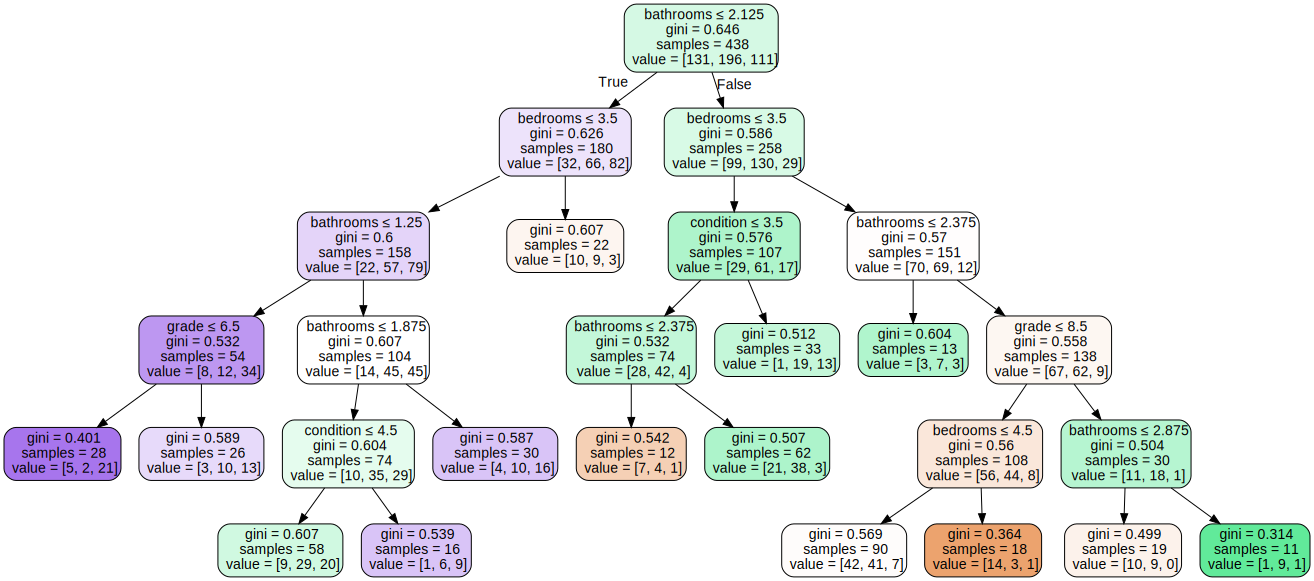

In [181]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=x.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [170]:
# import seaborn as sns
# sns.histplot(data=base, x='price_by_square_meter')
# sns.scatterplot(y='zipcode', x='price_by_square_meter', hue='class', data=base)
graph.format = 'png'
graph.render()

'Source.gv.png'

In [182]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=10, min_impurity_decrease=0.001, min_samples_split=20)
x = base[['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade']]
y = base['caro']
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.05)
clf.fit(x, y)
predictions=clf.predict(x[-10:])
list(predictions)

[1, 1, 1, 1, 1, 0, 1, 1, 1, 0]

In [183]:
list(base['caro'][-10:])

[0, 1, 1, 1, 1, 1, 1, 2, 1, 0]